# Más ejemplos de backtrack


## Introducción

## Generar caminos en una gráfica

Encontrar todos los caminos de $u$ a $v$ en una gráfica. Ahora los potenciales candidatos son vértices que no hayan sido visitados con anterioridad. Sí nos importa el orden.

In [1]:
import networkx as nx

G=nx.petersen_graph()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


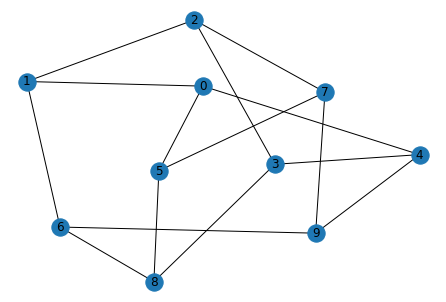

In [2]:
print(nx.nodes(G))
print(nx.edges(G))
nx.draw(G,with_labels=True)

¿Cuántos caminos hay de $0$ a $6$? Los hacemos mediante backtrack.

[0, 1, 2, 3, 4, 9, 6]
[0, 1, 2, 3, 4, 9, 7, 5, 8, 6]
[0, 1, 2, 3, 8, 5, 7, 9, 6]
[0, 1, 2, 3, 8, 6]
[0, 1, 2, 7, 5, 8, 3, 4, 9, 6]
[0, 1, 2, 7, 5, 8, 6]
[0, 1, 2, 7, 9, 4, 3, 8, 6]
[0, 1, 2, 7, 9, 6]
[0, 1, 6]
[0, 4, 3, 2, 1, 6]
[0, 4, 3, 2, 7, 5, 8, 6]
[0, 4, 3, 2, 7, 9, 6]
[0, 4, 3, 8, 5, 7, 2, 1, 6]
[0, 4, 3, 8, 5, 7, 9, 6]
[0, 4, 3, 8, 6]
[0, 4, 9, 6]
[0, 4, 9, 7, 2, 1, 6]
[0, 4, 9, 7, 2, 3, 8, 6]
[0, 4, 9, 7, 5, 8, 3, 2, 1, 6]
[0, 4, 9, 7, 5, 8, 6]
[0, 5, 7, 2, 1, 6]
[0, 5, 7, 2, 3, 4, 9, 6]
[0, 5, 7, 2, 3, 8, 6]
[0, 5, 7, 9, 4, 3, 2, 1, 6]
[0, 5, 7, 9, 4, 3, 8, 6]
[0, 5, 7, 9, 6]
[0, 5, 8, 3, 2, 1, 6]
[0, 5, 8, 3, 2, 7, 9, 6]
[0, 5, 8, 3, 4, 9, 6]
[0, 5, 8, 3, 4, 9, 7, 2, 1, 6]
[0, 5, 8, 6]


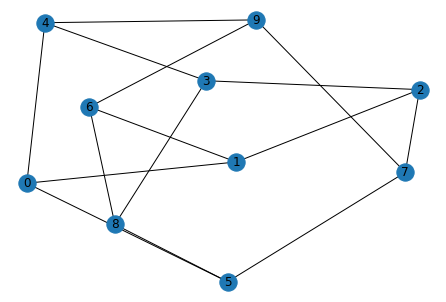

In [3]:
def paths(G,u,v,a=[],sols=[]):
    if len(a)==0:
        a.append(u)
    if a[-1]==v:
        sols+=[a.copy()]
        return sols
    candidates=[]
    # Aquí abajo hay algo cuadrático sucediendo que se puede mejorar pasando candidates en la recursión
    for j in nx.all_neighbors(G,a[-1]):
        if j not in a:
            candidates.append(j)
    for j in candidates:
        a.append(j)
        sols=paths(G,u,v,a,sols)
        a.remove(j)
    return sols

pathsuv=paths(G,0,6)
# pathsuv.sort(key=lambda x:len(x))
for path in pathsuv:
    print(path)
    
nx.draw(G,with_labels=True)

## Generar coloraciones de gráficas

También podemos hacer backtrack para encontrar coloraciones con cierto número de colores para una gráfica, si es que existen. Vamos avanzando en llenar un vector $(c_1,\ldots,c_k)$ con los colores correspondientes a los vértices $v_1,\ldots,v_k$.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


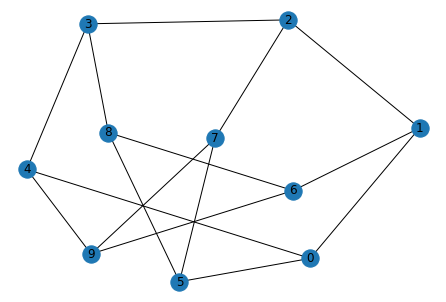

In [4]:
import matplotlib.pyplot as plt
G=nx.petersen_graph()
print(nx.nodes(G))
print(nx.edges(G))
nx.draw_kamada_kawai(G,with_labels=True)

120


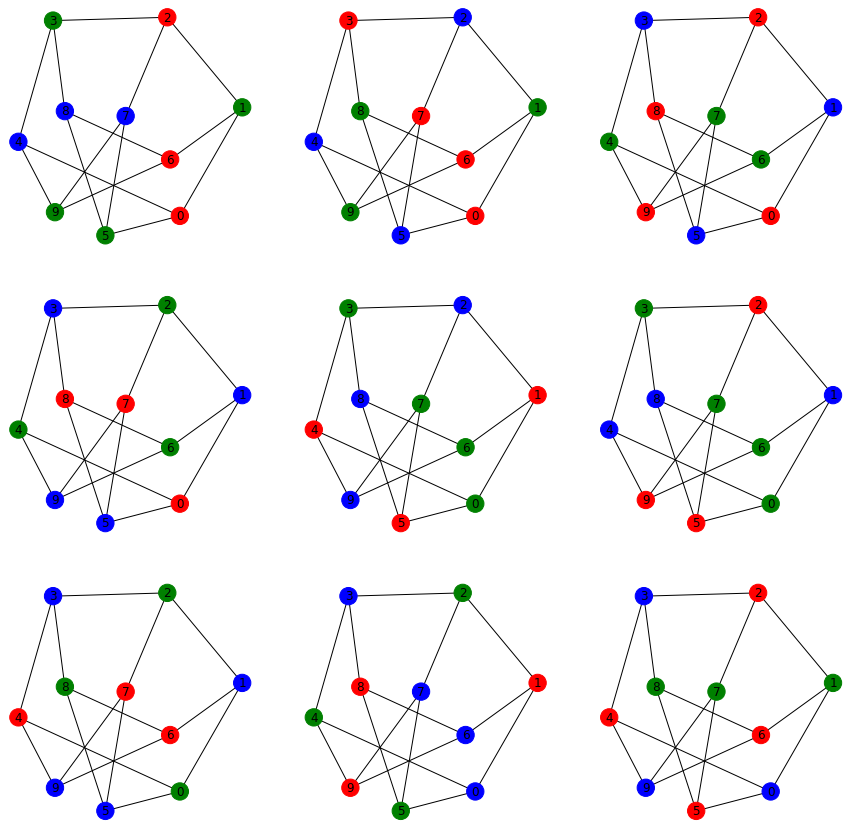

In [5]:
def three_col(G,n,a=[],sols=[]):
    k=len(a)
    if k==n:
        sols.append(a.copy())
        return(sols)
    candidates=[0,1,2]
    for j in nx.all_neighbors(G,k):
        if j<k and (a[j] in candidates):
            candidates.remove(a[j])
    for j in candidates:
        a.append(j)
        sols=three_col(G,n,a,sols)
        a.pop()
    return(sols)

proper=three_col(G,10)
colors=['red','green','blue']

fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)
print(len(proper))
for k in range(9):
    one_proper=[colors[j] for j in proper[13*k]]
    nx.draw_kamada_kawai(G,node_color=one_proper,with_labels=True,ax=axs[int(k/3),k%3])

Intentemos ver el backtrack en acción

In [6]:
def three_col_accion(G,n,a=[],track=[]):
    k=len(a)
    track.append(a.copy())
    if k==n:
        return track
    candidates=[0,1,2]
    for j in list(nx.all_neighbors(G,k)):
        if j<=k and (a[j] in candidates):
            candidates.remove(a[j])
    for j in candidates:
        a.append(j)
        track=three_col_accion(G,n,a)
        a.pop()
    return track

proper=three_col_accion(G,10)

In [8]:
# Primer forma de dibujarlo
for k in proper:
    while len(k)<10:
        k.append(3)
print(len(proper))
colors=['red','green','blue','black']
j=0
plt.figure(figsize=(7,7))
for coloring in proper:
    nx.draw_kamada_kawai(G,node_color=[colors[k] for k in coloring],with_labels=True,node_size=1800,font_size=36)
    plt.savefig('backtrack/{:0>3}.png'.format(j))
    plt.clf()
    j+=1

658


<Figure size 504x504 with 0 Axes>

658


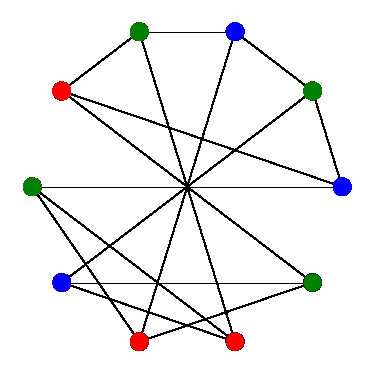

In [89]:
# Segunda forma de dibujarlo
for k in proper:
    while len(k)<10:
        k.append(3)
print(len(proper))
colors=['red','green','blue','black']
j=0
plt.figure(figsize=(5,5))
for coloring in proper:
    nx.draw_circular(G,node_color=[colors[k] for k in coloring])
    plt.savefig('backtrack/c{:0>3}.png'.format(j),with_labels=True)
    plt.clf()
    j+=1

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Problema
2. Problema
3. Problema
4. Problema
5. Problema